<font size="6" style="line-height: 1.5em;">ECON 323 Project</font><br>



Yichun Pan  004   65237307   

Nuo Xu  004    25739681 

We found the data needed, cleaned the data, merged the data, and brainstormed graphs and plots that might be used for the data visualization together. Then, each person wrote some different parts of the code with the explanation for markdown parts. Afterwards, we explained to each other the work we've done and why we code like this to create such kind of visualization, and finally we unified each part to complete the entire project.

The main objective of this analysis is to investigate the possible correlation between a country's Olympic medal count and its economic performance. To be precise, the research question being addressed is: 

<font size="3" style="line-height: 1.5em;">Whether there exists a relationship between the number of Olympic medals won by a country and its GDP per capita, as well as the underlying factors that may contribute to this association.</font>

## Background: 
The Olympic Games are a global multi-sport event that brings together athletes from around the world to compete against each other. The first modern Olympics took place in Athens, Greece in 1896 and have since grown into a phenomenon that captures the attention of millions of people worldwide.

The Games include both summer and winter sports with a variety of disciplines, from track and field to gymnastics, swimming, skiing, and more. The Games are a symbol of unity, excellence, and perseverance, inspiring athletes and spectators alike to pursue their dreams and reach their full potential. Athletes come from all walks of life to represent their countries and compete for medals. When we look at the public medal tally of previous Olympic Games, we can see that most of the top-ranking countries are developed nations. This raises the question of whether a country's economic performance can also affect its performance in sporting events on such a global stage as the Olympic Games, which unite nations, promote diplomacy, and showcase national strength. Given the tremendous influence of the Games, we believe that examining the relationship between economic performance and Olympic success can provide valuable insights into the interplay between sports and the economy, and the ways in which countries leverage their resources to achieve sporting excellence.



## Data selection: 
For the indicator of countries’ economic performance, we think Gross Domestic Product could be a good consideration. GDP is a measure of the total value of all goods and services produced within a country's borders in a given period, typically a year. GDP per capita is the GDP divided by the total population of a country. It is a measure of the average economic output per person and is often used to compare living standards between countries. GDP per capita provides a more accurate picture of the standard of living in a country, as it takes into account population size. In this research, we will use GDP per capita, instead of using data on GDP, to predict earnings and show the standard of living across countries. While GDP per capita alone still does not provide a complete picture of a country's economic performance, we will use it as an accurate indicator in this study, ignoring other factors such as income inequality, access to healthcare and education, and social welfare programs.

To ensure accurate results, we collected data from three Summer Olympic Games (2008 Beijing, 2012 London, and 2016 Rio) and three Winter Olympic Games (2010 Vancouver, 2014 Sochi, and 2018 Pyeongchang). However, we made a conscious decision to exclude the data from the two most recent Olympic Games (2020 Tokyo and 2022 Beijing) due to the unprecedented COVID-19 pandemic that affected the global economy.

The outbreak of COVID-19 in early 2020 led to significant changes in economic trends worldwide. The pandemic resulted in lockdowns and travel restrictions, which severely impacted international trade, supply chains, and consumer demand. Countries that rely heavily on tourism, such as Japan, were hit particularly hard due to the postponement of the 2020 Tokyo Olympics. Moreover, many countries faced a decline in their GDP as a result of reduced economic activities and decreased productivity.

Therefore, to ensure that our study results reflect the reality of countries' economic performances, we decided to exclude the data from the recent two Olympic Games. By doing so, we aim to eliminate the potential distortion caused by the COVID-19 pandemic and ensure that the outcomes are closer to the realized fact. Although excluding the data from the two most recent Olympic Games may limit the scope of our analysis, we believe that it will provide more accurate and meaningful results.

Due to time constraints, we were unable to obtain precise data on the number of ski resorts in countries and ski population share in European countries in a time-series manner for our analysis of the underlying factors contributing to the relationship between the number of Olympic medals won by a country and its GDP per capita. Obtaining specific values for these two types of data for the range of Olympic years selected for our study (2008-2018) proved to be extremely difficult, then we decided to assume that the two data points did not change significantly over time and used cross-sectional data to analyze the relevant potential factors. (from just a few of these time points we found, the two types of data really do not change much). Anyway, we will continue to enhance the flavor/richness of this project in the very near future.

Note: in the following analysis, we refer to high GDP per capita countries as high-income countries.



## Methodology: 
1. General visualizations to show the economic performance and Olympic success across countries (including GDP per capita, medal amounts, growth rate, and medal ranking by countries, etc.)
2. Visualization of the trend between the number of Olympic medals and countries’ GDP (for the top 15 countries in the medal standings of the six selected Olympic Games) - Presentation of estimation results from regressions
3. Exploring the underlying reasons that might explain that correlation:
* Economic perspective 
* Participant demographic perspective
* Cultural perspective
* Geographical perspective
4. Conclusion, discussion of the limitations of our study, and areas for further research.


<font size="5" style="line-height: 1.5em;">GDP per capita Dataset</font><br>
<font size="3" style="line-height: 1.5em;">Presentation of GDP per capita by country from 2008 to 2018</font>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('323_data.xlsx', sheet_name='GDP per capita')
df.head(11).set_index('year')

: 

Resource: https://ourworldindata.org/grapher/gdp-per-capita-worldbank?tab=chart&yScale=log&time=latest&country=

/tmp/ipykernel_180/331117175.py:34: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_180/331117175.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_180/331117175.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_180/331117175.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_180/331117175.p

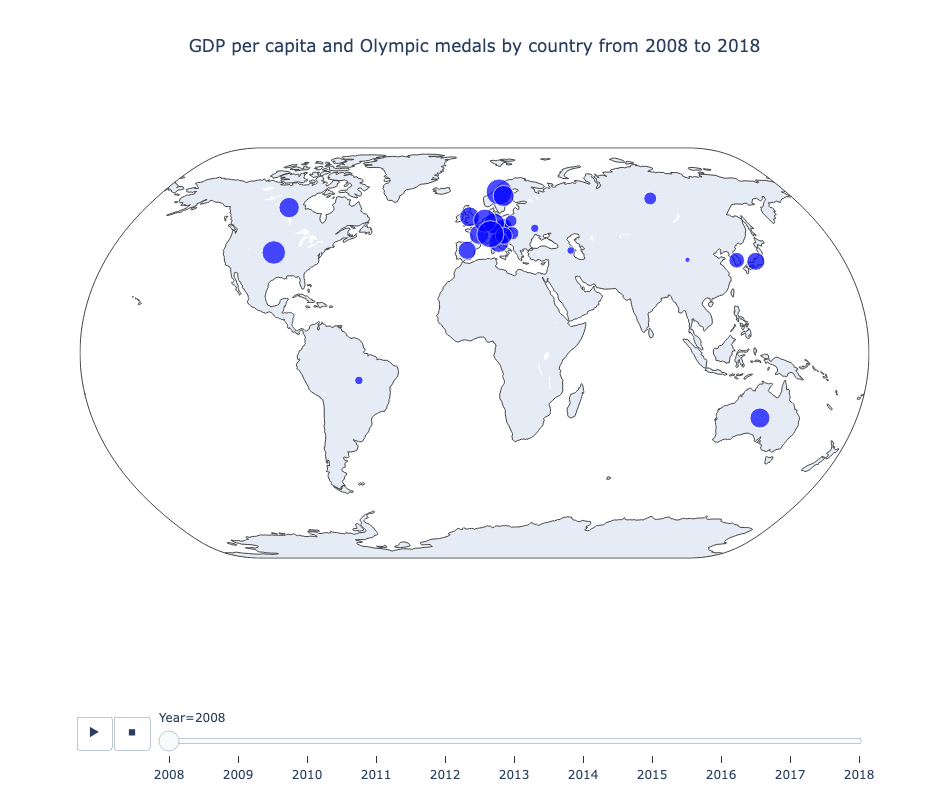

In [47]:
import pandas as pd
import plotly.express as px
import plotly.offline as py
import numpy as np


def generate_hover_data(row):
    hover_data = {}
    if row['Year'] in [2008, 2012, 2016, 2010, 2014, 2018]:
        for part in ['Value', 'Gold', 'Silver', 'Bronze', 'Total']:
            if row[part] != '':
                hover_data[part] = row[part]
            else:
                hover_data[part] = '0'
    else:
        # if row['Value'] != '':
        #     hover_data['Value'] = row['Value']
        # else:
        #     hover_data['Value'] = '0'
        for part in ['Value', 'Gold', 'Silver', 'Bronze', 'Total']:
            if row[part] != '':
                hover_data[part] = row[part]
            else:
                hover_data[part] = '0'
    hover_data['0'] = 1
    return hover_data

excel_pth = '323_data.xlsx'
medal_amount_series = pd.read_excel(excel_pth, sheet_name=['figure1'], header=1)
medal_amount_series = medal_amount_series['figure1']
GDP_series = pd.read_excel(excel_pth, sheet_name=['GDP per capita'], index_col=0, header=0)
GDP_series = GDP_series['GDP per capita']
a = medal_amount_series.iloc[:-2]
a = a.groupby(['Olympic name', 'Country'])['Gold', 'Silver', 'Bronze', 'Total'].max()
b = GDP_series
# b = b.iloc[:-2]
b = b.replace(np.nan, "NaN")
b = b.stack().reset_index()
b.columns = ['Year', 'Country', 'Value']
b['Gold'] = None
b['Silver'] = None
b['Bronze'] = None
b['Total'] = None
bb = b.groupby(['Year', 'Country']).max()
# print(bb)
year_country = {}
for info in bb.index:
    (name_year, country) = info
    if name_year not in year_country.keys():
        year_country[name_year] = []
    year_country[name_year].append(country)
for info in a.index:
    (name, country) = info
    name_year = int(name[:4])
    # print(year_country)
    if name_year == 2018 and country == 'ROC':
        ccc = 0
    if country not in year_country[name_year]:
        for part in ['Value', 'Gold', 'Silver', 'Bronze', 'Total']:
            bb.loc[(name_year, country), part] = None
    for part in ['Gold', 'Silver', 'Bronze', 'Total']:
        bb[part][(name_year, country)] = a[part][info]
bb = bb.reset_index()
# bb['Year'] = pd.to_datetime(bb['Year'].astype(str), format='%Y').dt.year
bb['Year'] = pd.to_datetime(bb['Year'].astype(float), format='%Y').dt.year
bb['Value'] = bb['Value'].astype(float)
max_color_value = int(max(bb['Value']))+2
bb['Size'] = bb['Value']
bb['Size'] = bb['Size'].fillna(0)
sizemax = max(bb['Size'])
bb['Size'] = (bb['Size']/1000)**1.5

bb['Value'] = bb['Value'].fillna('null')
bb['Gold'] = bb['Gold'].fillna('null')
bb['Silver'] = bb['Silver'].fillna('null')
bb['Bronze'] = bb['Bronze'].fillna('null')
bb['Total'] = bb['Total'].fillna('null')

# hover_data=bb.apply(generate_hover_data, axis=1)

# fig = px.scatter_geo(bb, locations="Country", locationmode='country names',
#                      color_discrete_sequence=['blue'], size_max=30, hover_name="Country", hover_data=hover_data,
#                      range_color=[0, max_color_value],
#                      projection="natural earth", animation_frame='Year')

hover_data = [
    ['Value', 'Gold', 'Silver', 'Bronze', 'Total'],
    ['Value'],
] * (278 // 2)
# fig = px.scatter_geo(bb, locations="Country", locationmode='country names',
#                      color_discrete_sequence=['blue'], size_max=30, hover_name="Country", hover_data=['Value', 'Gold', 'Silver', 'Bronze', 'Total'],
#                      range_color=[0, max_color_value],
#                      projection="natural earth", animation_frame='Year')
fig = px.scatter_geo(bb, locations="Country", locationmode='country names',
                     color_discrete_sequence=['blue'], size='Size', hover_name="Country", hover_data=['Value', 'Gold', 'Silver', 'Bronze', 'Total'],
                     range_color=[0, max_color_value],
                     projection="natural earth", animation_frame='Year',
                     width=1000,
                     height=800)

test_list = []
for i in range(len(bb)):
    year = bb.loc[i, 'Year']
    if year in [2008, 2012, 2016, 2010, 2014, 2018]:
        text = f"Gold: {bb.loc[i, 'Gold']}, Silver: {bb.loc[i, 'Silver']}, Bronze: {bb.loc[i, 'Bronze']}, Total: {bb.loc[i, 'Total']}, Value: {bb.loc[i, 'Value']}"
    else:
        text = f"Value: {bb.loc[i, 'Value']}"
    test_list.append(text)
fig.data[0].text = test_list
fig.update_traces(text=fig.data[0].text, textposition='top center', hovertemplate='%{text}<br>')
fig.update(layout_coloraxis_showscale=False,layout_title={
        'text': "GDP per capita and Olympic medals by country from 2008 to 2018",'x': 0.5,'y': 0.95})
py.offline.iplot(fig)


                                                       Figure 1

With this world map, we can visualize the geographical distribution of the top 15 winning countries of the each six selected Olympic Games(2008-2018), the total number of medals of each Olympics, and the GDP per capita of each countries during this decade of years 2008-2018. A quick glance at the map reveals that gold medalists are spread across the globe, with a higher concentration in Europe, North America, and East Asia, primarily in affluent nations. It might make us start to wonder if there is any relationship between sports performance and national income and development. 

Notice: Each dot shown on this world map represents a country. When it is a non-Olympic year, for example 2009, the number of medals is displayed null. The size of the dot indicates the corresponding magnitude of GDP per capita for each country. The "value" in the information box represents gdp per capita, but if this value is used as the size of the dot directly, we found that there is a lot of overlap and the size distinction is not obvious, so we added a new variable-"size", which is transformed by "value", to be the standard of size representation of dots. 

<font size="3" style="line-height: 1.5em;">In addition, because the top 15 countries are mostly European countries, the images of the European region will be more overlapping, so please zoom in for better results.</font>

<font size="5" style="line-height: 1.5em;">Medal amount Dataset</font><br>


Example: Presentation of Medal amount of The 2008 Summer Olympics are shown below.

In [48]:
df = pd.read_excel('323_data.xlsx', sheet_name='figure2',header = 1)
df.head(10).set_index('Rank')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Gold,Silver,Bronze,Total
Rank,,,,,
1,USA,36,39,37,112
2,China,48,22,30,100
3,Russian,24,13,23,60
4,Great Britain,19,13,19,51
5,Australia,14,15,17,46
6,France,7,16,20,43
7,Germany,16,11,14,41
8,Korea,13,11,8,32
9,Cuba,3,10,17,30


In [49]:
summer2008 = df.iloc[0:15, :]
summer2012 = df.iloc[18:33, :]
summer2016 = df.iloc[36:51, :]
winter2010 = df.iloc[54:69, :]
winter2014 = df.iloc[72:87, :]
winter2018 = df.iloc[90:105, :]

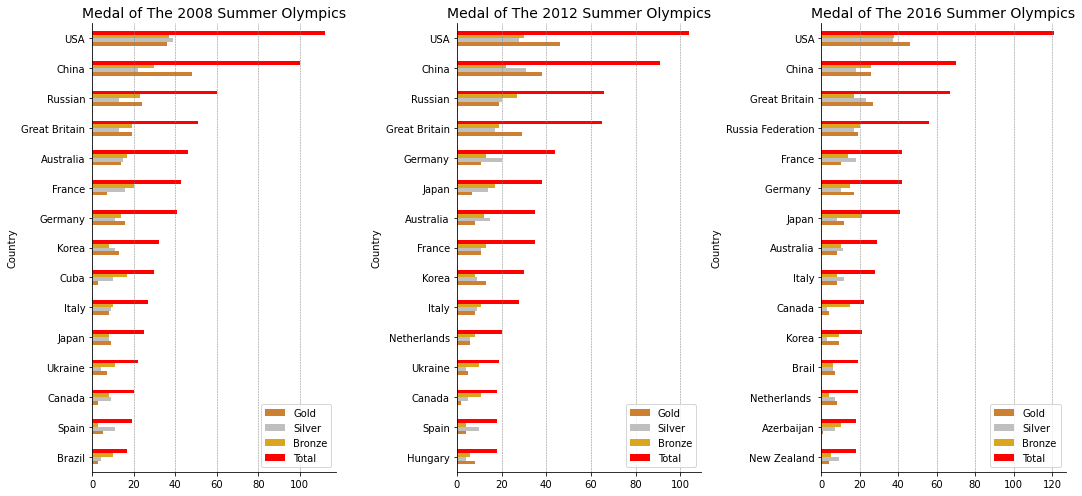

In [50]:
import pandas as pd
summer08 = pd.DataFrame({'Country': summer2008.iloc[:, 1],'Gold': summer2008.iloc[:, 2],'Silver': summer2008.iloc[:, 3],
                         'Bronze': summer2008.iloc[:, 4],'Total': summer2008.iloc[:, 5]}).set_index('Country')
summer12 = pd.DataFrame({'Country': summer2012.iloc[:, 1],'Gold': summer2012.iloc[:, 2],'Silver': summer2012.iloc[:, 3],
                         'Bronze': summer2012.iloc[:, 4],'Total': summer2012.iloc[:, 5]}).set_index('Country')
summer16 = pd.DataFrame({'Country': summer2016.iloc[:, 1],'Gold': summer2016.iloc[:, 2],'Silver': summer2016.iloc[:, 3],
                         'Bronze': summer2016.iloc[:, 4],'Total': summer2016.iloc[:, 5]}).set_index('Country')



colors = [ (0.804, 0.498, 0.196),(0.75, 0.75, 0.75), (0.855, 0.647, 0.125),(1.0, 0.0, 0.0)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
# plt.subplots_adjust(wspace=0.5)
summer08.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[0], color=colors)
summer12.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[1], color=colors)
summer16.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[2], color=colors)

# Set background color
# axes[0].set_facecolor('white')

# Add grid
axes[0].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_title("Medal of The 2008 Summer Olympics",fontsize=14)
axes[1].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_title("Medal of The 2012 Summer Olympics",fontsize=14)
axes[2].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].set_title("Medal of The 2016 Summer Olympics",fontsize=14)
plt.tight_layout()


                                                  Figure 2 (1)
                                                                             

From 2008, 2012, and 2016 three Summer Olympics medal count bar charts, which are shown above, we can recognize that the United States, China, Britain, and Russia, which have occupied the top fourth in three consecutive games, were really dominating the Olympic medal tally. In specific, China, the United States have been located in either the first, or second-place positions. For a country like China, which does not have a high GDP per capita, how could it perform well in the Olympic Games? 

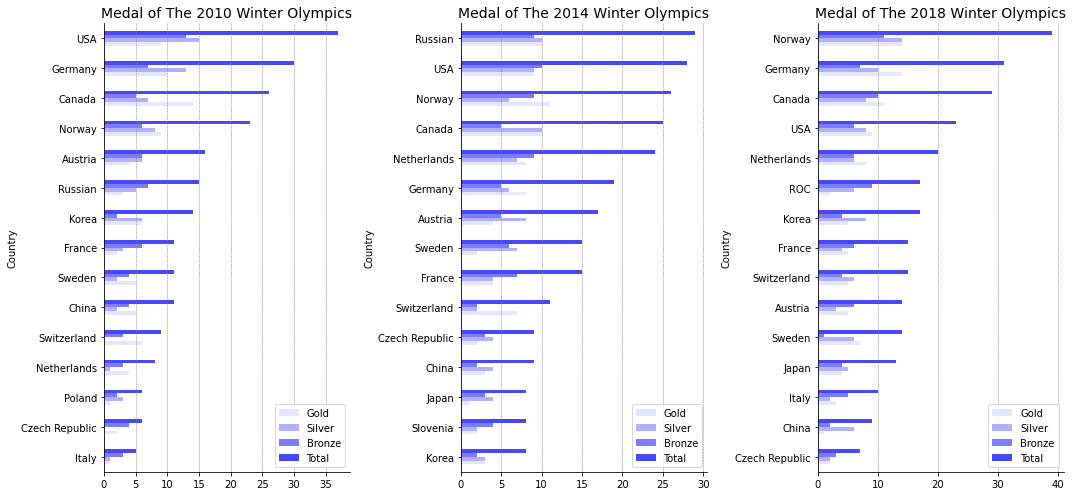

In [51]:
winter10 = pd.DataFrame({'Country': winter2010.iloc[:, 1],'Gold': winter2010.iloc[:, 2],'Silver': winter2010.iloc[:, 3],
                         'Bronze': winter2010.iloc[:, 4],'Total': winter2010.iloc[:, 5]}).set_index('Country')
winter14 = pd.DataFrame({'Country': winter2014.iloc[:, 1],'Gold': winter2014.iloc[:, 2],'Silver': winter2014.iloc[:, 3],
                         'Bronze': winter2014.iloc[:, 4],'Total': winter2014.iloc[:, 5]}).set_index('Country')
winter18 = pd.DataFrame({'Country': winter2018.iloc[:, 1],'Gold': winter2018.iloc[:, 2],'Silver': winter2018.iloc[:, 3],
                         'Bronze': winter2018.iloc[:, 4],'Total': winter2018.iloc[:, 5]}).set_index('Country')

colors = [(0.902, 0.902, 0.997), (0.695, 0.695, 0.993), (0.488, 0.488, 0.989),(0.282, 0.282, 0.985), (0.078, 0.078, 0.980)]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

plt.subplots_adjust(wspace=0.6)
winter10.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[0], color=colors)
winter14.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[1], color=colors)
winter18.sort_values(by="Total", ascending=True).tail(15).plot(kind="barh", ax=axes[2], color=colors)
# Add grid
axes[0].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_title("Medal of The 2010 Winter Olympics",fontsize=14)
axes[1].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_title("Medal of The 2014 Winter Olympics",fontsize=14)
axes[2].grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].set_title("Medal of The 2018 Winter Olympics",fontsize=14)
plt.tight_layout()

                                                   Figure 2 (2)

Resource: https://olympics.com/en/olympic-games

In contrast to the Summer Olympics, the position at the top of the medal standings at the Winter Olympics seems to be more volatile. China no longer occupies the top two positions, and its ranking has dropped. On the other hand, Norway and Canada, etc have shown relatively better performances at the Winter Olympics, and have rushed to the top of the medal standings. Overall, the Winter Olympics have showcased a higher degree of variability in medal standings compared with Summer Olympics, with different countries performing well in different Olympic periods.

<font size="3" style="line-height: 1.5em;">Line chart of ranking for countries in three summer Olympics and three winter Olympics(Only countries ranked in the top 15 in all three Olympic Games are included)</font><br>

In [52]:
df = pd.read_excel('323_data.xlsx', sheet_name='figure3')
df.head(11).set_index('Country')

,2008,2012,2016,,,Country,2010,2014,2018
Country,,,,,,,,,
USA,1,1,1,|,|,USA,1,2,3
China,2,2,2,|,|,Germany,2,6,2
Russian,3,3,4,|,|,Canada,3,4,3
Great Britain,4,4,3,|,|,Norway,4,3,1
Australia,5,8,8,|,|,Austria,5,7,11
France,6,7,6,|,|,Korea,7,13,6
Germany,7,5,5,|,|,China,8,11,14
Korea,8,9,11,|,|,Sweden,8,9,10
Italy,10,10,9,|,|,France,10,8,9


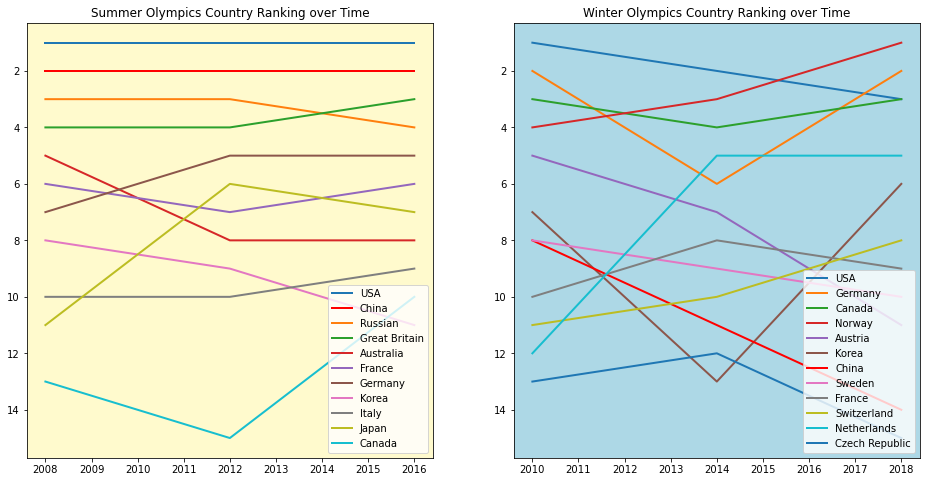

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for summer Olympics 
summer_data = {'Country': ['USA', 'China', 'Russian', 'Great Britain', 'Australia', 'France', 'Germany', 'Korea', 'Italy', 'Japan', 'Canada'],
               2008: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13],
               2012: [1, 2, 3, 4, 8, 7, 5, 9, 10, 6, 15],
               2016: [1, 2, 4, 3, 8, 6, 5, 11, 9, 7, 10]}

# Data for winter Olympics 
winter_data = {'Country': ['USA', 'Germany', 'Canada', 'Norway', 'Austria', 'Korea', 'China', 'Sweden', 'France', 'Switzerland', 'Netherlands', 'Czech Republic'],
               2010: [1, 2, 3, 4, 5, 7, 8, 8, 10, 11, 12, 13],
               2014: [2, 6, 4, 3, 7, 13, 11, 9, 8, 10, 5, 12],
               2018: [3, 2, 3, 1, 11, 6, 14, 10, 9, 8, 5, 15]}

# To convert data into DataFrame format
summer_df = pd.DataFrame(summer_data)
winter_df = pd.DataFrame(winter_data)

# To creat subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Creating line chart of ranking for countries in summer Olympics 
for i, country in enumerate(summer_df['Country']):
    if country == 'China':
        ax1.plot(summer_df.columns[1:], summer_df.iloc[i, 1:], color='red', linewidth=2, label=country)
    else:
        ax1.plot(summer_df.columns[1:], summer_df.iloc[i, 1:], linewidth=2, label=country)
ax1.invert_yaxis()

ax1.legend(loc='lower right')
ax1.set_title('Summer Olympics Country Ranking over Time')


ax1.set_facecolor('#FFFACD')

# Creating line chart of ranking for countries in winter Olympics 
for i, country in enumerate(winter_df['Country']):
    if country == 'China':
        ax2.plot(winter_df.columns[1:], winter_df.iloc[i, 1:], color='red', linewidth=2, label=country)
    else:
        ax2.plot(winter_df.columns[1:], winter_df.iloc[i, 1:], linewidth=2, label=country)
        
ax2.invert_yaxis()
ax2.legend(loc='lower right')
ax2.set_title('Winter Olympics Country Ranking over Time')

ax2.set_facecolor('#ADD8E6')


                                                    Figure 3

Resource: https://olympics.com/en/olympic-games

As we can see from the line chart, the rankings for the Winter Olympics are indeed more volatile than those for the Summer Olympics on a country basis. Although some countries may have been in the top 15 only once in the three Olympic Games and therefore did not change their ranking, we can see that more than ten countries were in the top 15 in all three Olympic Games, thus highlighting the relative stability of top-performing countries (these countries are also high-income countries). In addition, the countries leading the medal standings in the Winter Olympics differ from those in the Summer Olympics, suggesting that a country's strengths and advantages may differ for the winter and summer Olympics.


In [54]:
df = pd.read_excel('323_data.xlsx', sheet_name='figure4',header = 0)
df.head(10)

,2008,Medal Amount,GDP per capita
0,USA,112,55271.65625
1,China,100,7412.874512
2,Russian Federation,60,24887.85352
3,Great Britain,51,43767.69531
4,Australia,46,44743.66016
5,France,43,42996.21094
6,Germany,41,47643.22266
7,Korea,32,32275.125
8,Italy,27,44623.60156
9,Japan,25,38781.19922


Scatter plots on the number of medals versus national GDP per capita in Summer Olympics 

In [55]:
s08_countries = df.iloc[:14,0];s08_medal = df.iloc[:14,1];s08_gdp = df.iloc[:14,2]
s12_countries = df.iloc[16:33,0];s12_medal = df.iloc[16:33,1];s12_gdp = df.iloc[16:33,2]
s16_countries = df.iloc[33:50,0];s16_medal = df.iloc[33:50,1];s16_gdp = df.iloc[33:50,2]

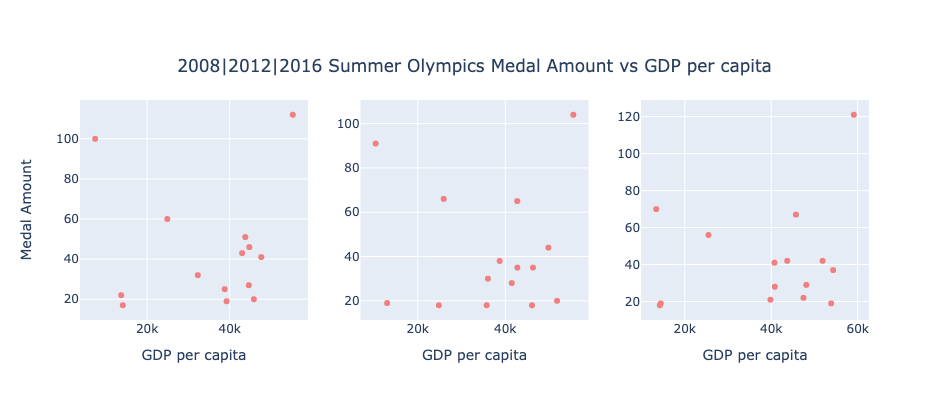

In [56]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# subplot
fig = make_subplots(rows=1, cols=3)

# 2008
fig.add_trace(
    go.Scatter(x=s08_gdp, y=s08_medal, mode='markers', marker_color='lightcoral', hovertext=s08_countries),
    row=1, col=1)
fig.update_xaxes(title_text="GDP per capita", row=1, col=1)
fig.update_yaxes(title_text="Medal Amount", row=1, col=1)
# fig.update_layout(title_text="2008 Summer Olympics Medal Amount vs GDP per capita", showlegend=False)

# 2012
fig.add_trace(
    go.Scatter(x=s12_gdp, y=s12_medal, mode='markers', marker_color='lightcoral', hovertext=s12_countries),
    row=1, col=2)
fig.update_xaxes(title_text="GDP per capita", row=1, col=2)
fig.update_yaxes( row=1, col=2)
# fig.update_layout(title_text="2012 Summer Olympics Medal Amount vs GDP per capita", showlegend=False)
#
# 2016
fig.add_trace(
    go.Scatter(x=s16_gdp, y=s16_medal, mode='markers', marker_color='lightcoral', hovertext=s16_countries),
    row=1, col=3)
fig.update_xaxes(title_text="GDP per capita", row=1, col=3)
fig.update_yaxes(row=1, col=3)
# fig.update_layout(title_text="2008|2012|2016 Summer Olympics Medal Amount vs GDP per capita", showlegend=False,height=400,width=850)
fig.update_layout(title={
        'text': "2008|2012|2016 Summer Olympics Medal Amount vs GDP per capita",'x': 0.5,'y': 0.85},
        showlegend=False,height=400,width=850)
# plot
fig.show()

                                          Figure 4 (1) 

Scatterplots on the number of medals versus national GDP per capita in Winter Olympics

In [57]:
s10_countries = df.iloc[48:64,0];s10_medal = df.iloc[48:64,1];s10_gdp = df.iloc[48:64,2]
s14_countries = df.iloc[65:81,0];s14_medal = df.iloc[65:81,1];s14_gdp = df.iloc[65:81,2]
s18_countries = df.iloc[82:98,0];s18_medal = df.iloc[82:98,1];s18_gdp = df.iloc[82:98,2]
# s18_medal

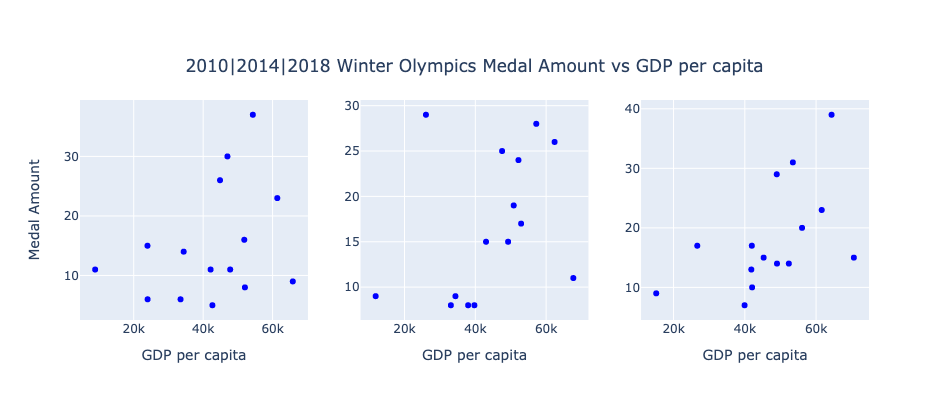

In [58]:
# subplot
fig = make_subplots(rows=1, cols=3)

# 2010
fig.add_trace(
    go.Scatter(x=s10_gdp, y=s10_medal, mode='markers', marker_color='blue', hovertext=s10_countries),
    row=1, col=1)
fig.update_xaxes(title_text="GDP per capita", row=1, col=1)
fig.update_yaxes(title_text="Medal Amount", row=1, col=1)

# 2014
fig.add_trace(
    go.Scatter(x=s14_gdp, y=s14_medal, mode='markers', marker_color='blue', hovertext=s14_countries),
    row=1, col=2)
fig.update_xaxes(title_text="GDP per capita", row=1, col=2)
fig.update_yaxes( row=1, col=2)
#
# 2018
fig.add_trace(
    go.Scatter(x=s18_gdp, y=s18_medal, mode='markers', marker_color='blue', hovertext=s18_countries),
    row=1, col=3)
fig.update_xaxes(title_text="GDP per capita", row=1, col=3)
fig.update_yaxes(row=1, col=3)
# fig.update_layout(title_text="2008|2012|2016 Summer Olympics Medal Amount vs GDP per capita", showlegend=False,height=400,width=850)
fig.update_layout(title={
        'text': "2010|2014|2018 Winter Olympics Medal Amount vs GDP per capita",'x': 0.5,'y': 0.85},
        showlegend=False,height=400,width=850)
# plot
fig.show()

                                          Figure 4 (2)

In figure4, we made scatter plots about the number of medals versus the country's GDP per capita, both from the Summer and Winter Olympics. We can see that there is a weak positive correlation between these two variables, especially from Winter Olympic data. Thus, as the country's GDP per capita increases, the number of medals won by that country also increases, with some outliners indicated.

GDP per capita growth rate dataset for countries that have been top 15 on medels standings in six Olympic Games

In [59]:
df = pd.read_excel('323_data.xlsx', sheet_name='GDP per capita growth rate')
df.head(11).set_index('year')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,United States of America,People's Republic of China,Russian Federation,Great Britain,Australia,France,Germany,Republic of Korea,Cuba,Italy,...,Netherlands,Hungary,Azerbaijan,Norway,Austria,Sweden,Switzerland,Czech Republic,Poland,Slovenia
year,,,,,,,,,,,,,,,,,,,,,
2008,-0.820368,9.090280,5.246210,-0.937078,1.513510,-0.302484,1.152030,2.233752,4.054764,-1.615941,...,1.773357,1.180953,8.457450,-0.768153,1.143307,-1.223070,1.509951,1.838240,4.185772,3.346280
2009,-3.450016,8.855948,-7.827750,-5.230035,-0.207409,-3.370397,-5.454577,0.275269,1.392178,-5.711508,...,-4.161039,-6.453067,7.050603,-2.958585,-4.016340,-5.151263,-3.510559,-5.198982,2.762525,-8.380320
2010,1.860292,10.102833,4.453096,1.630274,0.628837,1.448245,4.339607,6.274020,2.324767,1.400915,...,0.824260,1.304959,3.806491,-0.544794,1.592577,5.052679,2.173638,2.136880,3.229049,0.902771
2011,0.814519,8.953816,4.218723,0.280839,0.978468,1.700610,5.869636,2.891412,2.726846,0.534287,...,1.078628,2.155897,-1.195843,-0.320026,2.576448,2.418989,0.687340,1.550190,4.985722,0.652023
2012,1.533102,7.134524,3.849152,0.745479,2.103808,-0.171161,0.230161,1.865599,2.918528,-3.242060,...,-1.395919,-0.738926,0.816684,1.362985,0.222451,-1.321002,0.110597,-0.923735,1.545464,-2.843705
2013,1.138692,7.050734,1.538974,1.140213,0.828326,0.058150,0.163871,2.696151,2.636075,-2.972404,...,-0.424179,2.083241,4.450020,-0.180216,-0.562299,0.333985,0.628361,-0.079053,0.917452,-1.163521
2014,1.540381,6.750760,-1.045262,2.442466,1.060337,0.484564,1.784342,2.556220,0.954421,-0.917814,...,1.059101,4.513368,1.475937,0.826056,-0.122371,1.644244,1.108694,2.154500,3.914706,2.667134
2015,1.953004,6.420736,-2.183885,1.584979,0.693066,0.754024,0.617105,2.268429,4.365679,0.875477,...,1.508266,3.954283,-0.103121,0.957501,-0.111540,3.390176,0.494130,5.181403,4.452884,2.133258
2016,0.933375,6.238215,0.010248,1.393849,1.138424,0.829057,1.408102,2.539145,0.494992,1.465690,...,1.649316,2.503053,-4.177172,0.185060,0.892469,0.796146,0.960132,2.340552,2.997773,3.116347


In [60]:
usa = df.iloc[:11,1];china = df.iloc[:11,2];Russian = df.iloc[:11,3];Britain= df.iloc[:11,4];Australia=df.iloc[:11,5]
France=df.iloc[:11,6];Germany=df.iloc[:11,7];Korea= df.iloc[:11,8];Cuba=df.iloc[:11,9];
Italy,Japan,Ukraine,Canada,Spain,Brazil = df.iloc[:11,10],df.iloc[:11,11],df.iloc[:11,12],df.iloc[:11,13],df.iloc[:11,14],df.iloc[:11,15]
Netherlands,Hungary,Azerbaijan,Norway,Austria,Sweden= df.iloc[:11,16],df.iloc[:11,17],df.iloc[:11,18],df.iloc[:11,19],df.iloc[:11,20],df.iloc[:11,21]
Switzerland,Czech,Poland,Slovenia=df.iloc[:11,22],df.iloc[:11,23],df.iloc[:11,24],df.iloc[:11,25]

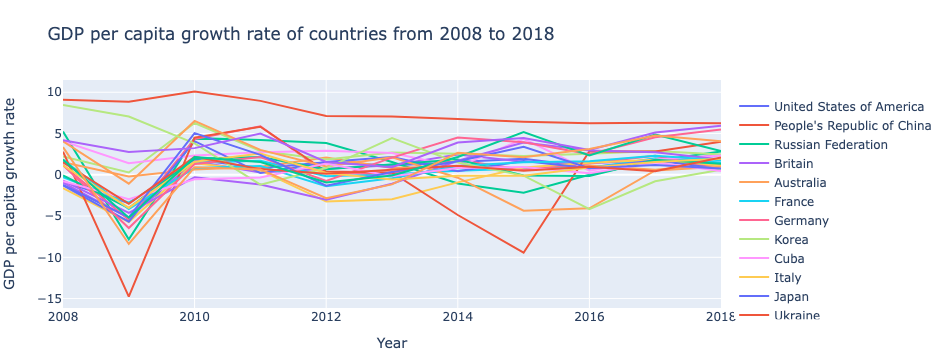

In [61]:
import plotly.graph_objs as go
import plotly.io as pio

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# define each line for each country
traces = [
    go.Scatter(x=years, y=usa, name='United States of America', mode='lines'),
    go.Scatter(x=years, y=china, name="People's Republic of China", mode='lines'),
    go.Scatter(x=years, y=Russian, name='Russian Federation', mode='lines'),
    go.Scatter(x=years, y=Britain, name='Britain', mode='lines'),
    go.Scatter(x=years, y=Australia, name='Australia', mode='lines'),
    go.Scatter(x=years, y=France, name='France', mode='lines'),
    go.Scatter(x=years, y=Germany, name='Germany', mode='lines'),
    go.Scatter(x=years, y=Korea, name='Korea', mode='lines'),
    go.Scatter(x=years, y=Cuba, name='Cuba', mode='lines'),
    go.Scatter(x=years, y=Italy, name='Italy', mode='lines'),
    go.Scatter(x=years, y=Japan, name='Japan', mode='lines'),
    go.Scatter(x=years, y=Ukraine, name='Ukraine', mode='lines'),
    go.Scatter(x=years, y=Canada, name='Canada', mode='lines'),
    go.Scatter(x=years, y=Spain, name='Spain', mode='lines'),
    go.Scatter(x=years, y=Brazil, name='Brazil', mode='lines'),
    go.Scatter(x=years, y=Netherlands, name='Netherlands', mode='lines'),
    go.Scatter(x=years, y=Hungary, name='Hungary', mode='lines'),
    go.Scatter(x=years, y=Azerbaijan, name='Azerbaijan', mode='lines'),
    go.Scatter(x=years, y=Norway, name='Norway', mode='lines'),
    go.Scatter(x=years, y=Austria, name='Austria', mode='lines'),
    go.Scatter(x=years, y=Sweden, name='Sweden', mode='lines'),
    go.Scatter(x=years, y=Switzerland, name='Switzerland', mode='lines'),
    go.Scatter(x=years, y=Czech, name='Czech', mode='lines'),
    go.Scatter(x=years, y=Poland, name='Poland', mode='lines'),
    go.Scatter(x=years, y=Slovenia, name='Slovenia', mode='lines'),
]

# layout
layout = go.Layout(
    title='GDP per capita growth rate of countries from 2008 to 2018',
    xaxis={'title': 'Year'},
    yaxis={'title': 'GDP per capita growth rate'},
    legend={'x': 1.02, 'y': 0.95},
    margin={'l': 50, 'b': 50, 't': 80, 'r': 50},
    hovermode='x'
)


fig = go.Figure(data=traces, layout=layout)


pio.show(fig)


                                              Figure 5 

Resource: https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG

As can be seen from the line graph of the country's GDP per capita growth rate, the trends of GDP per capita growth rate tend to be the same in most countries during this decade (2008-2018), concentrated between -5 and 5. Among them, China's GDP per capita change is quite unique in that its separate line is shown above most of the other lines, remaining above 6 and even higher. Despite the low GDP per capita, China's high GDP per capita growth rate may explain his good performance in the Olympic Games. (Will continue analyzing this point later)


In [62]:
import numpy as np
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='figure5')
# df.head(11)
y = df.iloc[0:89,1];
X = df.iloc[0:89,2:];
X = np.array(X)
y = np.array(y)
df.head(11)

,2008,MedalAmount,GDPpercapita,growthrate
0,USA,112,55271.656250,-0.820368
1,China,100,7412.874512,9.090280
2,Russian Federation,60,24887.853520,5.246210
3,Great Britain,51,43767.695310,-0.937078
4,Australia,46,44743.660160,1.513510
5,France,43,42996.210940,-0.302484
6,Germany,41,47643.222660,1.152030
7,Korea,32,32275.125000,2.233752
8,Italy,27,44623.601560,-1.615941
9,Japan,25,38781.199220,-1.272110


Coefficients:  [2.59868927e-05 9.87049373e-01]
Intercept:  26.803244458796424
Intercept:  26.803244458796424
y = 26.803244458796424 + 2.598689271355615e-05*x1 + 0.9870493725641499*x2


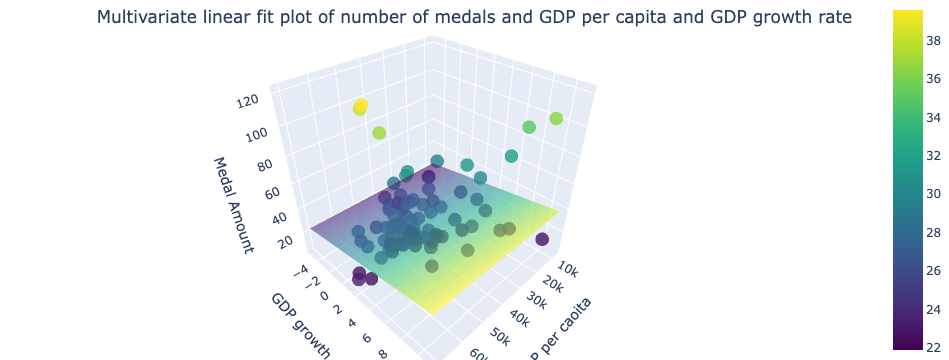

In [63]:
# Linear regression 3D plot
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
# Fit the model
model = LinearRegression().fit(X, y)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Intercept: ", model.intercept_)
coef = model.coef_
intercept = model.intercept_
equation = 'y = {} + {}*x1 + {}*x2'.format(intercept, coef[0], coef[1])
print(equation)
# Generate prediction values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
trace1 = go.Scatter3d(x=X[:, 0],y=X[:, 1],z=y,mode='markers',marker=dict(size=8,color=y,colorscale='Viridis',opacity=0.8))
trace2 = go.Surface(x=xx,y=yy,z=Z,colorscale='Viridis',opacity=0.6,)
data = [trace1, trace2]
layout = go.Layout(title={'text':'Multivariate linear fit plot of number of medals and GDP per capita and GDP growth rate','x':0.5,'y':0.97},
                   margin=dict(l=0, r=0, b=0, t=0),scene=dict(xaxis_title='GDP per caoita',yaxis_title='GDP growth rate',zaxis_title='Medal Amount'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
X_with_const = sm.add_constant(X)

model_sm = sm.OLS(y, X_with_const).fit()
print(model_sm.summary())

                                                Figure 6 (1)

y = 25.92 + 0.00*x1 + -0.00*x2 + 5.76*x1^2 + 0.00*x2^2 + -0.00x1x2


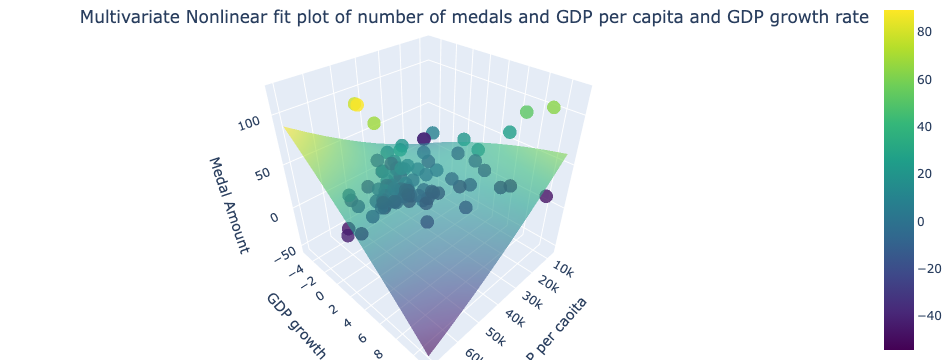

In [64]:
import numpy as np
import plotly.graph_objs as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit the model
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
model.fit(X, y)

# Print the equation of the fitted curve
coef = model.named_steps['linear'].coef_
intercept = model.named_steps['linear'].intercept_
equation = 'y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x1^2 + {:.2f}*x2^2 + {:.2f}x1x2'.format(intercept, coef[0], coef[1], coef[2], coef[3], coef[4])
print(equation)

# Generate prediction values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
trace1 = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers',
                      marker=dict(size=8, color=y, colorscale='Viridis', opacity=0.8))
trace2 = go.Surface(x=xx, y=yy, z=Z, colorscale='Viridis', opacity=0.6,)
data = [trace1, trace2]
layout = go.Layout(title={'text':'Multivariate Nonlinear fit plot of number of medals and GDP per capita and GDP growth rate','x':0.5,'y':0.97},
                   margin=dict(l=0, r=0, b=0, t=0), scene=dict(xaxis_title='GDP per caoita',yaxis_title='GDP growth rate',zaxis_title='Medal Amount'))
fig = go.Figure(data=data, layout=layout)
fig.show()


                                               Figure 6 (2)

We applied the linear regression and nonlinear regression, which are statistical modeling techniques used to examine the relationship between a dependent variable and independent variables (2 independent variables here). 
In the case of 3D plotting for linear regression, it can be used to create a regression plane that best fits the data points in a 3D scatter plot. It seems that as a country's GDP per capita and GDP per capita growth rate increase, so does its likelihood of winning Olympic medals. We’ve also checked nonlinear regression, which creates a regression surface that best fits the data points in a 3D scatter plot, even if the relationship is not linear. Nevertheless, the results are similar to linear regression, which shows the number of Olympic medals has a positive relationship with GDP per capita and GDP per capita growth rate. To sum up, from these two 3D scatter plots, we can suggests that economic development and growth are important factors that contribute to a country's success in the Olympic Games.


You might think that the positive relationship between GDP per capita/GDP per capita growth rate and the quantity of Olympic medals won is kind of intuitive and easy to speculate. Now, We want to dig a bit deeper: Why do some countries perform better in the Olympic Games (as measured by the number of medals)? What are the underlying reasons why countries with high GDP per capita usually have more medals? and How can we try to explain that correlation? 

We will analyze these questions by exploring the following four different perspectives one by one.  By doing so, we hope to provide a comprehensive understanding of the factors that contribute to a country's success in the Olympics, and how we can leverage this knowledge to improve athletic performance in countries with different levels of economic development.


## 1.  Economic perspective

In [65]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='Scale of Chinas sports industry',header =1 )
# y = df.iloc[0:89,1];
# X = df.iloc[0:89,2:];
# X = np.array(X)
# y = np.array(y)
df.head(3).set_index('Type')

,2015,2016,2017,2018,2019
Type,,,,,
Industry Output (unit: 10^12 RMB),1.71,1.90,2.20,2.66,2.95
Industry Output / GDP(%),0.80,0.87,0.94,1.10,1.14
Industry Output per capita (RMB),1240.00,1370.00,1546.00,1894.00,2094.00


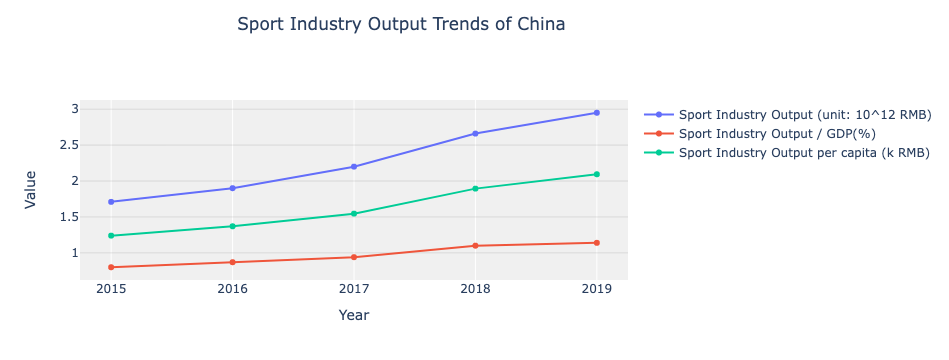

In [66]:
import plotly.graph_objs as go

# data
years = [2015, 2016, 2017, 2018, 2019]
industry_output = [1.71, 1.9, 2.2, 2.66, 2.95]
industry_output_gdp = [0.8, 0.87, 0.94, 1.1, 1.14]
industry_output_per_capita = [1240, 1370, 1546, 1894, 2094]

industry_output_per_capita_k = [i/1000 for i in industry_output_per_capita]

trace1 = go.Scatter(x=years, y=industry_output, mode='lines+markers', name='Sport Industry Output (unit: 10^12 RMB)')
trace2 = go.Scatter(x=years, y=industry_output_gdp, mode='lines+markers', name='Sport Industry Output / GDP(%)')
trace3 = go.Scatter(x=years, y=industry_output_per_capita_k, mode='lines+markers', name='Sport Industry Output per capita (k RMB)')

# layout = go.Layout(title='Industry Output Trends',
#                    xaxis_title='Year',
#                    yaxis_title='Value',
#                    plot_bgcolor='rgb(255, 255, 255)')
layout = go.Layout(
    title={'text':'Sport Industry Output Trends of China','x':0.25, 'y':0.95},
    xaxis_title='Year',yaxis_title='Value',plot_bgcolor='rgb(240, 240, 240)',
    yaxis=dict(showgrid=True,gridcolor='rgba(0, 0, 0, 0.1)'
    )
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

                                          Figure 7

Resource:

https://baijiahao.baidu.com/s?id=1760219976540280916&wfr=spider&for=pc 

https://pdf.dfcfw.com/pdf/H3_AP202202171547603546_1.pdf?1645192405000.pdf

When we talk about how does economic perspective affect countries’ Olympic performance, we take China as a main discussing object. We can find an interesting phenomenon from the analysis above: despite having a lower GDP per capita than other countries, China still holds a higher percentage of medals. This raises the question of whether there is a bias in favor of China. To answer this question, One possible explanation is about China's GDP per capita growth rate, as shown in Figure 5, China's GDP per capita growth rate is consistently positive and higher than other countries’, while other countries' growth rate lines fluctuate. This suggests that GDP growth per capita may be a factor in China's success in winning medals. 


Another possible worth mentioning reason why China has won quite lots of medals is that the difference in sports policies between China and Western countries. In Western countries, athletes typically have to pay for their own sports training fee, while in China, athletes are supported by the government: the government takes taxpayer money to train athletes. As China's GDP per capita increases, more money can be invested in sports, resulting in more resources being devoted to coaching, infrastructure, and other aspects of the sports industry. The figure 7 shows that the sports industry output in RMB, sports industry output over GDP percentage, and sports industry output per capita have all increased over time, indicating that more resources have been allocated to this particular industry each year, which makes China’s performance on Olympic games better. 


## 2. Participant demographic perspective

In [67]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='Athlets total number for summer',header=1)
df.head(11).set_index('Rank')
# y = df.iloc[0:89,1];
# X = df.iloc[0:89,2:];
# X = np.array(X)
# y = np.array(y) 

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Total Athlets,Total medalist
Rank,,,
1,United States of America,588,112
2,People's Republic of China,599,100
3,Russian Federation,454,60
4,Great Britain,309,51
5,Australia,432,46
6,France,309,43
7,Germany,420,41
8,Republic of Korea,265,32
9,Cuba,158,30


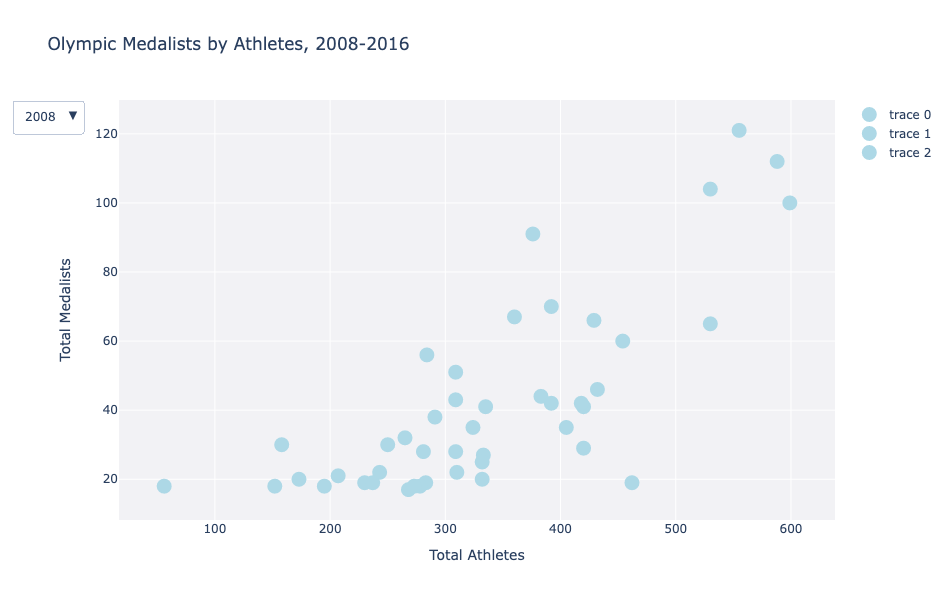

In [68]:
import plotly.graph_objs as go

# data
year_data = {
    2008: {
        'countries': ['United States of America', "People's Republic of China", 'Russian Federation','Great Britain', 'Australia', 'France', 'Germany', 'Republic of Korea', 'Cuba', 'Italy', 'Japan', 'Ukraine', 'Canada', 'Spain', 'Brazil']
,
        'athletes': df.iloc[0:15,2],'medalists': df.iloc[0:15,3]
    },
    2012: {
        'countries': ['United States of America', "People's Republic of China", 'Russian Federation', 'Great Britain', 'Germany', 'Japan', 'France', 'Australia', 'Republic of Korea', 'Italy', 'Netherlands', 'Ukraine', 'Hungary', 'Spain', 'Canada'],
        'athletes': df.iloc[19:34,2],'medalists': df.iloc[19:34,3]
    },
    2016: {
        'countries': ['United States of America', "People's Republic of China", 'Great Britain', 'Russia Federation', 'Germany', 'France', 'Japan', 'Australia', 'Italy', 'Canada', 'Republic of Korea', 'Netherlands', 'Brail', 'New Zealand', 'Azerbaijan'],
        'athletes': df.iloc[38:53,2],'medalists':df.iloc[38:53,3]
    }
}

def create_trace(year):
    trace = go.Scatter(
        x=year_data[year]['athletes'],y=year_data[year]['medalists'],mode='markers',
        marker=dict(size=15,color='#ADD8E6'), text=year_data[year]['countries'])
    return trace

fig = go.Figure()

for year in year_data.keys():
    trace = create_trace(year)
    fig.add_trace(trace)

updatemenu = []
buttons = []

for year in year_data.keys():
    button = dict(
        method='update',args=[{'visible': [year == y for y in year_data.keys()]}],label=str(year))
    buttons.append(button)

updatemenu = list([
    dict(active=0, buttons=buttons)
])

fig.update_layout(
    updatemenus=updatemenu,width=600, height=600,
    xaxis_title='Total Athletes',yaxis_title='Total Medalists',title='Olympic Medalists by Athletes, 2008-2016',
    plot_bgcolor='rgb(242, 242, 245)'
)

fig.show()


                                         Figure 8

Resource: https://www.nbcsports.com/northwest/tokyo-olympics/tokyo-olympics-numbers-participating-country-stats-and-facts

We are probably thinking that when the size of the athlete population in Olympics for a country increases, the higher probability this country will gain more medals. It is reasonable to assume that countries with higher GDP per capita would have more athletes participating in Olympics, as individuals with higher income tend to have more resources to invest in their favorite activities.

To investigate this percentage of Owning a medal, we analyzed data on the number of athletes and medals won in the three Summer Olympics using a scatter plot, which shown as figure 8. From the plot, we might revealed a positive linear relationship between the two variables across all three years of data, suggesting that countries with more athletes have a higher probability of winning medals.


## 3. Cultural perspective

Besides other perspectives, we also try to explore that whether sports cultures plays a crucial role in high-income countries through collecting Winter Olympic games data. We will discuss the following two main points using examples: 
#### (1) Lifestyle aspect;  for e.g. Europeans are very fond of participating in skiing activities in winter.


In [69]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='figure9',header=0)
df.head(17).set_index('Number')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Total number of ski resorts,Share of people who ski,2010-2018total medal amount,2010 # of total mentals,2014 # of total mentals,2018 # of total mentals
Number,,,,,,,
1,United States of America,525,,88.0,37.0,28.0,23.0
2,Germany,680,0.18,80.0,30.0,19.0,31.0
3,Canada,297,,80.0,26.0,25.0,29.0
4,Norway,172,0.22,88.0,23.0,26.0,39.0
5,Austria,442,0.34,47.0,16.0,17.0,14.0
6,Russian Federation,174,0.03,61.0,15.0,29.0,17.0
7,Republic of Korea,21,,39.0,14.0,8.0,17.0
8,People's Republic of China,382,,29.0,11.0,9.0,9.0
9,Sweden,256,0.18,40.0,11.0,15.0,14.0


Scatter plot on the total number of medals in 3 winter Olympics versus share of people who ski for each country

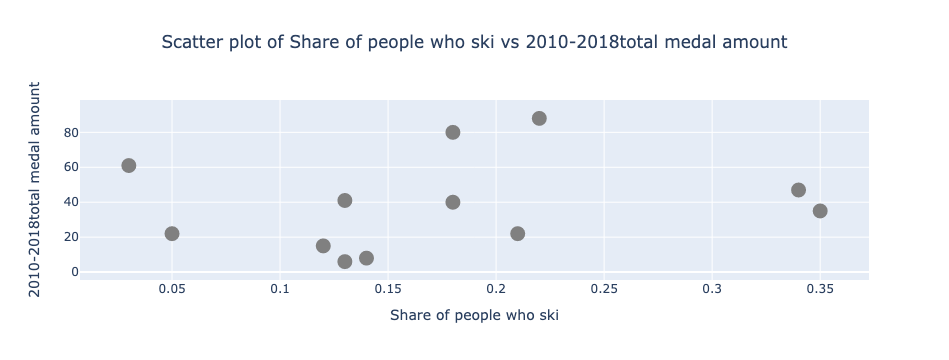

In [70]:
import plotly.graph_objs as go


data = {
    "Country": ["Germany", "Norway", "Austria", "Russian Federation", "Sweden", "France", "Switzerland", "Czech Republic","Poland",
                "Italy", "Slovenia", "Spain" ],
    "Share of people who ski": [0.18, 0.22, 0.34, 0.03, 0.18, 0.13, 0.35, 0.21,0.13, 0.12, 0.14, 0.05],
    "2010-2018total medal amount": [80, 88, 47, 61, 40, 41, 35, 22, 6, 15, 8, 22]
}


fig = go.Figure(
    go.Scatter(
        x=data["Share of people who ski"],
        y=data["2010-2018total medal amount"],
        mode="markers",
        text=data["Country"],
        marker=dict(
            color="gray",
            size=15
        ),
        hovertemplate="Country: %{text}<br>" +
                      "Share of people who ski: %{x}<br>" +
                      "2010-2018total medal amount: %{y}"
    )
)


fig.update_layout(
    title={'text':"Scatter plot of Share of people who ski vs 2010-2018total medal amount",'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Share of people who ski",
    yaxis_title="2010-2018total medal amount",
)


fig.show()


                                                   Figure 9

Resource: https://www.statista.com/statistics/801047/europe-share-of-population-skiing-by-country/

European ski participation rates, also named as ski population share, is calculated as the ski population divided by the total population, and we collected ski population share data from European countries. We hope to find that countries with ski population share may win more medals in the Winter Olympics. 

Initially, we made scatter plot on the total number of medals in 3 Winter Olympics versus share of people who ski for each country. Unfortunately, there is no any clear relationship between these two variables. To explain this, we think it may be because some countries with a high share of people who ski do not participate in the Winter Olympics, and simultaneously, our ski population share data are mainly come from Europe, leading us for lacking data from non-European countries. In this way, many non-European countries that have been top 15 for three Winter Olympics have no relevant data (US, China, Canada, etc.), resulting in a somewhat fewer dots.


Bar chart for share of people who ski in European countries

In [71]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='ski population share',header=0)
df.head(10).set_index('Number')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,European Countries,Share of people who ski
Number,,
1,Liechitenstein,0.36
2,Switzerland,0.35
3,Austria,0.34
4,Finland,0.23
5,Norway,0.22
6,Czech Republic,0.21
7,Andorra,0.2
8,Slovakia,0.18
9,Sweden,0.18


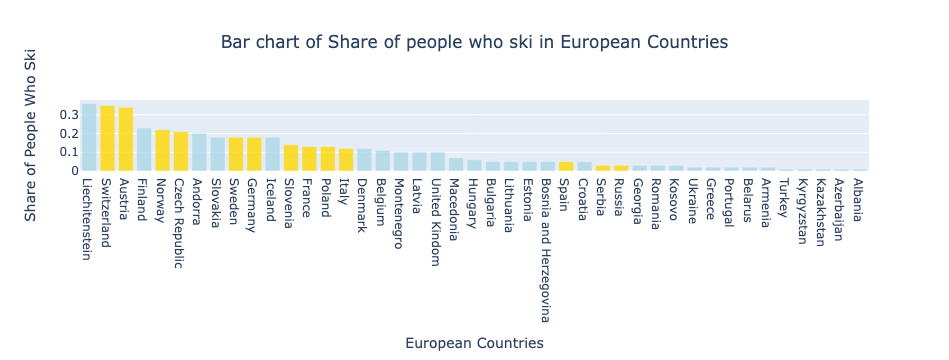

In [72]:
import plotly.graph_objs as go


data = {
    "European Countries": df.iloc[0:43,1],
    "Share of people who ski": df.iloc[0:43,2]
}


fig = go.Figure(
    go.Bar(x=data["European Countries"],y=data["Share of people who ski"],
        marker=dict(
            color=['rgba(255, 215, 0, 0.8)' if country in ['Germany', 'Norway', 'Austria', 'Russian Federation', 'Sweden', 'France', 'Switzerland', 'Netherlands', 'Czech Republic', 'Poland', 'Italy', 'Slovenia', 'Spain', 'Serbia', 'Russia'] else 'rgba(173, 216, 230, 0.8)' for country in data["European Countries"]]
        )
    )
)


fig.update_layout(
    title={'text':"Bar chart of Share of people who ski in European Countries",'x': 0.5,
        'y': 0.9,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="European Countries",
    yaxis_title="Share of People Who Ski",
)


fig.show()


                                                 Figure 10 

Nonetheless, in figure 10, the bar chart for share of people who ski in European countries, we can still see that the top 15 medal-winning countries (highlighted in yellow bars) in selected 3 Winter Olympics tend to be located in areas with higher ski share (ski participation rates). This further implies that the European countries that have been top 15 are also the countries that have a higher ski population share themselves. 


#### (2). Cultural Strength;  for e.g. China Table tennis 


In [73]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='China Table Tennis Competiton', header=0)
df.head(17)

,country,Gold,Silver,Bronze,China Winning Medal Proportion
0,2008 Summer Beijing - Table Tennis Medalist,,,,
1,Singles Men,China,China,China,100%'
2,Singles Women,China,China,China,100%'
3,Team Men,China,Germany,Korea,1st
4,Team Women,China,Singapore,Korea,1st
5,,,,,
6,2012 Summer London - Table Tennis Medalist,,,,
7,Singles Men,China,China,Germany,100%'
8,Singles Women,China,China,Singapore,100%'
9,Team Men,China,Korea,Germany,1st


Resource: https://olympics.com/en/olympic-games

Some countries may have traditional sports that they are particularly good at and concentrate on. In these cuntries, with the presence of superior coaching resources, training infrastructure, this sport will naturally stand out. Surely we would expect that countries with higher GDP per capita are more likely to have the ability to invest more in this specific sport.

We can take China’s Table tennis as an example for this point. China has a long history of success in table tennis, and it is interesting to look at their ranking and medal count over the years. The table below summarizes China's medal count in three Summer Olympic games, showing that table tennis is definitely one of China's strengths.

It is worth noting that China only won two medals instead of three in the singles competitions at the 2012 London Olympics and 2016 Rio Olympics, meaning they did not take all of the three medals. The underlying reason is because after the 2008 Beijing Olympics, the International Table Tennis Federation decided to reduce the number of single table tennis players from each country from three to two. It simply means even though China won only two medals, its winning medals proportion was still 100%. Indeed, we have to say that this rule change limits the potential number of medals that China may win at their strength, but it also somewhat promotes other countries in table tennis.

Similar examples can be found in other sports, such as Russia's success in figure skating, which may be attributed to their cultural background and traditions in that sport.


## 4. Geographical perspective

Scatter plot on the total number of medals in 3 Winter Olympics versus the number of ski resorts for each country

In [74]:
import plotly.graph_objs as go
# Scatterplots on the total number of medals in 3 Winter Olympics versus the number of ski resorts for each country
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=22)
df.iloc[:17,:4].set_index('number')
# df.iloc[:17,1]

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Total number of ski resorts,2010-2018 # of total mentals
number,,,
1,United States of America,525,88.0
2,Germany,680,80.0
3,Canada,297,80.0
4,Norway,172,88.0
5,Austria,442,47.0
6,Russian Federation,174,61.0
7,Republic of Korea,21,39.0
8,People's Republic of China,382,29.0
9,Sweden,256,40.0


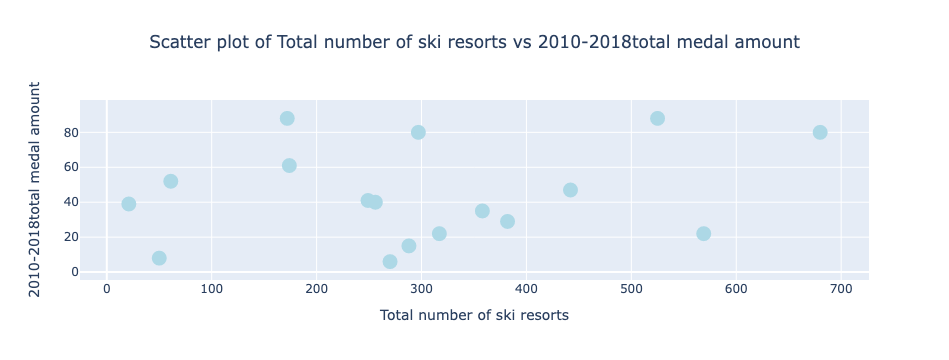

In [75]:
import plotly.graph_objs as go
# Scatterplots on the total number of medals in 3 Winter Olympics versus the number of ski resorts for each country
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=22)
data = {
#     "Country": ["United States of America", "Germany", "Canada", "Norway", "Austria", "Russian Federation", "Republic of Korea", "People's Republic of China", "Sweden", "France", "Switzerland", "Netherlands", "Czech Republic"],
#     "Total number of ski resorts": [525, 680, 297, 172, 442, 174, 21, 382, 256, 249, 358, 61, 317],
#     "2010-2018total medal amount": [88, 80, 80, 88, 47, 61, 39, 29, 40, 41, 35, 52, 22]
    "Country": df.iloc[:17,1],
    "Total number of ski resorts":df.iloc[:17,2],
    "2010-2018total medal amount":df.iloc[:17,3],
    
}

fig = go.Figure(
    go.Scatter(
        x=data["Total number of ski resorts"],
        y=data["2010-2018total medal amount"],
        mode="markers",
        marker=dict(color="lightblue",size=15),
        text=data["Country"],
        hovertemplate="Country: %{text}<br>" +
                      "Total number of ski resorts: %{x}<br>" +
                      "2010-2018total medal amount: %{y}"
    )
)

fig.update_layout(
    title={'text':"Scatter plot of Total number of ski resorts vs 2010-2018total medal amount",'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Total number of ski resorts",
    yaxis_title="2010-2018total medal amount",
)
fig.show()


                                                     Figure 11

Resource: https://www.skiresort.info/ski-resorts/

We expect that high-income countries have more resources to invest in sports facilities, to better use of potential geographical advantages, in contrast to low-income countries. To investigate our suspicions, we merged medal-winning countries with each country's total number of ski resorts. For this analysis, we collected data from the top 15 countries in three Winter Olympic Games (a total of 17 countries). We desire to find out if more ski resorts would make it easier for people to access ski sports, and thus be more likely to perform better in Winter Olympic sports.

From the scatter plot on the total number of medals in 3 Winter Olympics versus the number of ski resorts for each country, it seems that there is no clear relationship between the number of functioning ski resorts and the quantity of medals won. To explain this result, we think that other factors, such as the size and quality of ski resorts and participation rates, could also be relevant indicators. Nevertherless, our limited dataset prevents us from determining whether the number of ski resorts has any clear impact on a country's medal amounts.


In [76]:
import pandas as pd
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=0)
df.head(17).set_index('number')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Total number of ski resorts,2010 # of total mentals,2014 # of total mentals,2018 # of total mentals
number,,,,,
1,United States of America,525,37,28.0,23.0
2,Germany,680,30,19.0,31.0
3,Canada,297,26,25.0,29.0
4,Norway,172,23,26.0,39.0
5,Austria,442,16,17.0,14.0
6,Russian Federation,174,15,29.0,17.0
7,Republic of Korea,21,14,8.0,17.0
8,People's Republic of China,382,11,9.0,9.0
9,Sweden,256,11,15.0,14.0


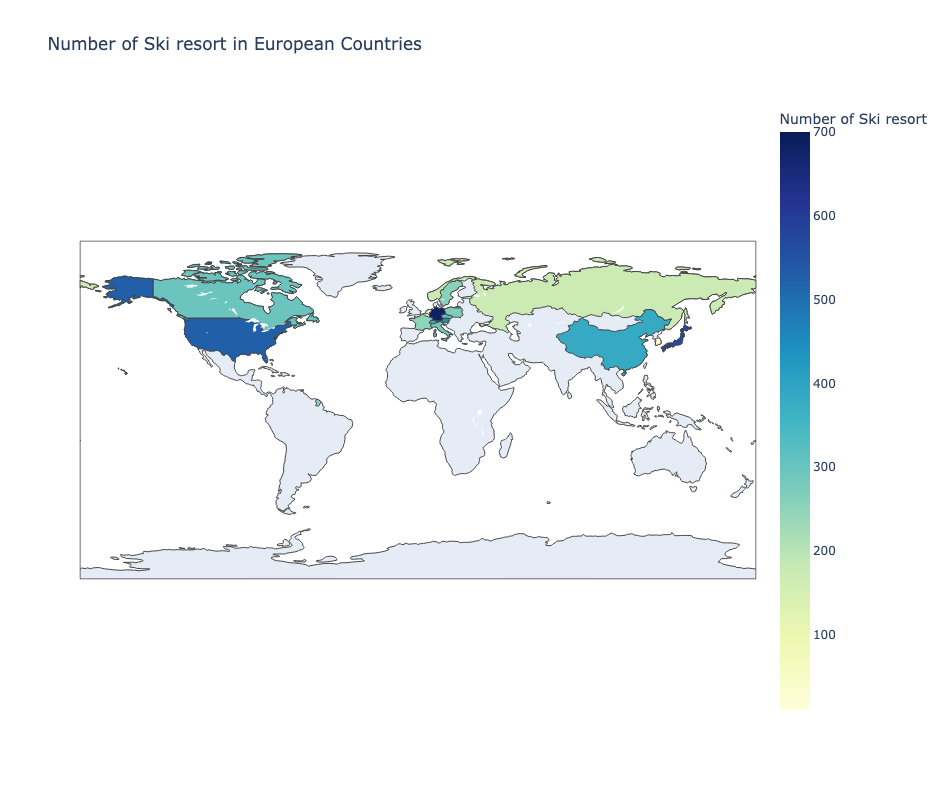

In [77]:
import plotly.express as px
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=0)
data = {'Countries': df.iloc[:17,1].tolist(),
        'Number of Ski resort': df.iloc[:17,2].tolist()}
df = pd.DataFrame(data)

fig = px.choropleth(df, 
                    locations='Countries', 
                    locationmode='country names', 
                    color='Number of Ski resort', 
                    color_continuous_scale='YlGnBu',
                    range_color=[10, 700],
                    title='Number of Ski resort in European Countries',
                    width=1000,
                    height=800)
fig.show()




                                              Figure 12

In [78]:
import plotly.express as px
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=22)
df.iloc[:17,:4].set_index('number')

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Country,Total number of ski resorts,2010-2018 # of total mentals
number,,,
1,United States of America,525,88.0
2,Germany,680,80.0
3,Canada,297,80.0
4,Norway,172,88.0
5,Austria,442,47.0
6,Russian Federation,174,61.0
7,Republic of Korea,21,39.0
8,People's Republic of China,382,29.0
9,Sweden,256,40.0


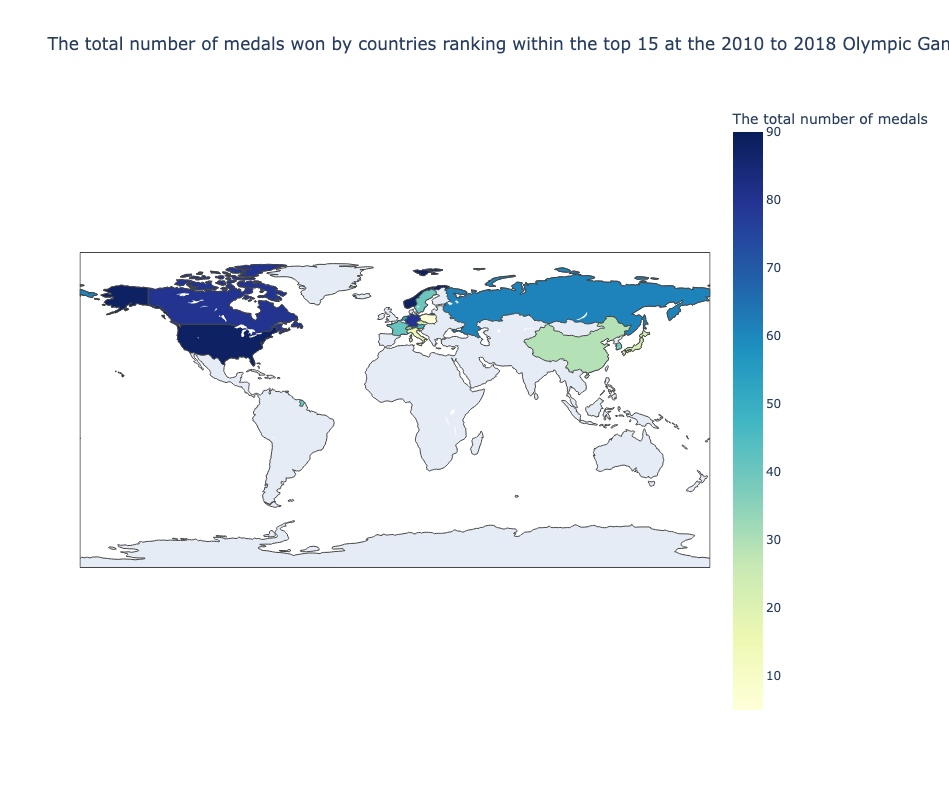

In [79]:
import plotly.express as px
df = pd.read_excel('323_data.xlsx', sheet_name='Number of Ski resort ', header=22)
data = {'Countries': df.iloc[:17,1].tolist(),
        'The total number of medals': df.iloc[:17,3].tolist()}
df = pd.DataFrame(data)

fig = px.choropleth(df, 
                    locations='Countries', 
                    locationmode='country names', 
                    color='The total number of medals', 
                    color_continuous_scale='YlGnBu',
                    range_color=[5, 90],
                    title='The total number of medals won by countries ranking within the top 15 at the 2010 to 2018 Olympic Games.',
                    width=1000,
                    height=800)
fig.show()


                                                 Figure 13

In these two thermodynamic diagrams, shown as figure 12 and figure 13, the number of ski resorts and medal-winning countries for top 15 in three Winter Olympic Games are displayed respectively. The shading of the diagrams indicates that darker colors represent countries with more ski resorts or more medals, while lighter colors represent countries with fewer ski resorts or fewer medals. Although the shades of the two thermodynamic diagrams do not correspond exactly, there is a clear correlation between the number of ski resorts and a country's performance in the Winter Olympics. The darker the color of an area showing the number of ski resorts, the darker the color of the corresponding area on the diagrams of the number of Winter Olympic medals. This suggests that geographical factors, such as the number of ski resorts, may play a role in a country's success in the Winter Olympics.

In addition, figure 13 also can be demonstrated that countries located at higher latitudes tend to have more medals, which shown as darker colors, suggesting better performance in the Winter Olympics. This pattern is linked to geographical factors as well; Intuitively, countries closer to the Arctic Circle typically experience colder temperatures and heavier snowfall, creating ideal conditions for winter sports and potentially enhancing athletes' ability to compete in the Winter Olympics. For example, several European countries, including Norway, Switzerland, and the Netherlands, have consistently ranked highly in the Winter Olympics medal list and are located at relatively high latitudes.

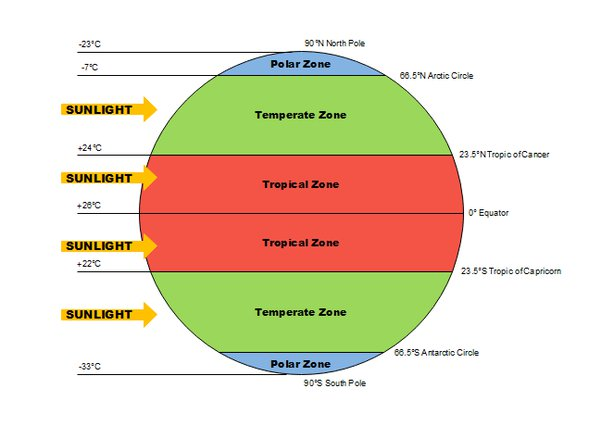

In [80]:
from IPython.display import Image

Image(filename='world climate zone.jpg', width=700)

                                         Figure 14

Resource: https://qr.ae/prL3ts

From figure 14 shown above, we can see that with the change of latitude, the whole earth is divided into several different climate zones. We believe that this distribution of temperature zones is also an important geographic factor that can influence a country's sports performance in the Olympics, as well as its GDP per capita. In the following, we will explore this.

In [81]:
df = pd.read_excel('323_data.xlsx', sheet_name='Climate and latitute',header=1)
df.head(25).set_index('Country')

,Major,Minor
Country,,
United States of America,North Temperate Zone,North Polar Zone
People's Republic of China,North Temperate Zone,North Tropical Zone
Russian Federation,North Temperate Zone,North Polar Zone
Great Britain,North Temperate Zone,Null
Australia,South Temperate Zone,Sorth Tropical Zone
France,North Temperate Zone,Null
Germany,North Temperate Zone,Null
Republic of Korea,North Temperate Zone,Null
Cuba,North Tropical Zone,Null


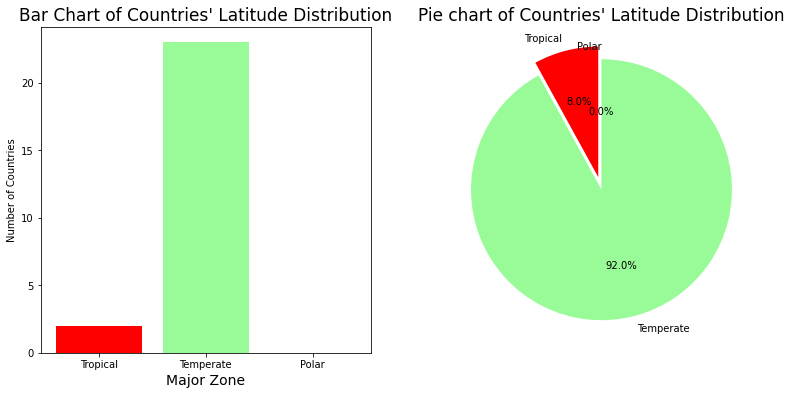

In [82]:
import matplotlib.pyplot as plt

# data
countries = countries = ['United States of America', "People's Republic of China", 'Russian Federation','Great Britain',
                         'Australia', 'France', 'Germany', 'Republic of Korea',
                         'Cuba','Italy', 'Japan', 'Ukraine',
                         'Canada', 'Spain', 'Brazil', 'Netherlands',
                         'Hungary','Azerbaijan', 'Norway', 'Austria',
                         'Sweden', 'Switzerland', 'Czech Republic','Poland', 'Slovenia']
latitudes = ['North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone',
             'South Temperate Zone', 'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone',
             'North Tropical Zone', 'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone',
             'North Temperate Zone', 'North Temperate Zone', 'South Tropical Zone', 'North Temperate Zone',
             'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone',
             'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone', 'North Temperate Zone',
             'North Temperate Zone']

# count the number of countries for each climate zone
low_lat_count1 = latitudes.count('North Tropical Zone')
low_lat_count2 = latitudes.count('South Tropical Zone')
low_lat_count = low_lat_count1+low_lat_count2

mid_lat_count1 = latitudes.count('North Temperate Zone')
mid_lat_count2 = latitudes.count('South Temperate Zone')
mid_lat_count = mid_lat_count1 +mid_lat_count2

high_lat_count = len(countries) - low_lat_count - mid_lat_count
# print(low_lat_count,mid_lat_count,high_lat_count)

# create bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

x = ['Tropical', 'Temperate', 'Polar']
y = [low_lat_count, mid_lat_count, high_lat_count]
colors = ['red', '#98FB98', '#87CEEB']
ax1.bar(x, y, color=colors)

ax1.set_title('Bar Chart of Countries\' Latitude Distribution', fontsize=17)
ax1.set_xlabel('Major Zone',fontsize=14)
ax1.set_ylabel('Number of Countries')

# create pie chart
labels = ['Tropical', 'Temperate', 'Polar']
sizes = [low_lat_count, mid_lat_count, high_lat_count]
colors = ['red', '#98FB98', '#87CEEB']
explode = (0.1, 0, 0)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

ax2.set_title('Pie chart of Countries\' Latitude Distribution', fontsize=17)

plt.show()


                                               Figure 15

Resource: Wikipedia for each country, and you are welcome to explore it yourself and find out we're right! :)

What insights can we glean if we explore the latitudes of all top 15 ranked countries in the all past six Olympic game?
In figure 15, we have collected information on the climate zones of the top 15 countries in the last six Olympic Games: Tropical zone, North Temperate zone, South Temperate zone, North polar zone and South polar zone. (We do not distinguish between the northern and southern hemispheres in the graphs) We have chosen the predominant climate area within each country as a major consideration, and exclude minor climate zones since smaller portions of a country's land area tend to hold less significance. In this way, we can draw more a plausible estimate. In the pie chart, the result reveals that most of the top 15 ranked countries in the past six Olympic Games are located in the (North) temperate zone, and same result as shown in bar chart. This may indicate that areas with milder climates are more suitable for sports, at the same time the data shown earlier (figure 1, figure 13, etc) also shows that the economic development of the temperate zone is relatively better, with a higher GDP per capita.


## Limitations and Further Research:
1. Lack of precise data on the number of ski resorts and ski population share in countries that ranked in the top 15 in the selected three Winter Olympics, which may lead to inaccuracies in the scatter plots we made.

* To be specific, limited ski population share data, as it only comes from European countries, resulting in a lack of data from non-European countries, such as the US, China, and Canada. etc. This causes results in somewhat fewer dots shown. In this way, we might be unable to see the clear underlying relationship between the number of medals in the Winter Olympics versus the share of people who ski. Moreover, for the scatter plot on the total number of medals in the winter Olympics versus the number of ski resorts, because we did not account for other potentially relevant factors in the dataset, such as the size and quality of ski resorts and participation rates, the possible potential relationship is then not shown.

2. Our 1st selected Olympics data started in 2008, however, for sports industry output data, we only find data from 2015 and ended in 2019 in China. Due to the lack of time series data on sports investment since 2008 and the absence of year-by-year data for other countries, we cannot determine whether the trend of sports investment in the 2015-2019 period is similar to the 2008-2018 period in China, nor can we be sure about the development of the sports sector in other countries.

3. To explore the relationship between countries' Olympic performance (measured by medal counts) and their GDP per capita, a viable approach that we did not include here would be to identify a policy experiment that would generate variation in countries' GDPs and examine its impact on Olympic performance. Unfortunately, due to the project’s time constraints, we were unable to identify such a policy experiment and investigate its effectiveness.

Considering the limitations of our current study, future research should focus on collecting more precise data on ski resorts and ski population shares worldwide, including non-European countries, to better understand the relationship between winter sports participation and Olympic success. Additionally, acquiring time series data on sports investment since 2008 for various countries would enable a more accurate comparison of sports development investments and their potential impact on Olympic performance. Lastly, analyzing a policy experiment that affects countries' GDPs could provide insights into the causal relationship between GDP per capita and Olympic success, further enhancing our understanding of the factors influencing Olympic performance.






## Conclusion: 
To investigate the relationship between a country's GDP per capita and the number of Olympic medals won, we collected data related to the Olympic Games before the COVID-19 pandemic. Our analysis focused on the medals earned in three summers and three winter Olympic Games.

Our findings indicate that there is a positive correlation between a country's GDP per capita and the number of medals won in both linear and non-linear regression models. Additionally, the GDP per capita growth rate is also positively associated with the country’s Olympic medals amounts in the Olympic Games. We further explored various aspects might contribute to higher-income countries achieving higher rankings in the Olympic Games.

China's consistent progress in the Summer Olympics can be attributed to its high GDP per capita growth rate. As GDP increases, more funding is allocated to sports, and China's policy emphasizes government support for nurturing athletes. Industry output data shows that China's sports output has been growing annually.
High-income countries tend to have more athletes and win more medals due to a larger participation base population. In low-income countries, people may prioritize work over being a athletes. From the scatter plot data, there is a linear relationship between the participation base population and the number of medals won. As a result, high-income countries tend to have relatively more athletes, which increases their likelihood of winning medals.

We observed that the winners of the Winter and Summer Olympics tended to fall into two distinct country groups.  With the winning countries of the Winter Olympics primarily concentrated in Europe, we wondered if certain sports might be related to national geographic characteristics.  High-income countries are typically more willing to invest in sports, to better use potential geographical advantages, and construct more accessible sports places.

We also examined the number of ski resorts and ski population share in the top 15 winning countries across three Winter Olympics. However, our analysis revealed no clear relationship between these 2 variables and the number of medals won, which may be due to our limited dataset does not allow us to establish a definitive connection directly.

